## total sum of squared distances within all clusters

In [26]:
import time
import warnings

from copy import deepcopy

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from itertools import cycle, islice

import timeit

In [27]:
# distance calculator

def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)



In [28]:
n_samples=1000


## example dataset -> blobs


own implementation

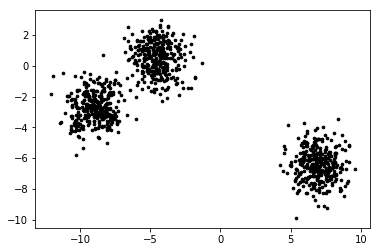

In [29]:
blobs = datasets.make_blobs(n_samples=n_samples, random_state=15)

points_blobs=blobs[0]

f1=points_blobs[0:((n_samples)), 0]
f2=points_blobs[0:((n_samples)), 1]

plt.scatter(f1, f2, c='black', s=7)

X = np.array(list(zip(f1, f2)))

2005.7054783614328


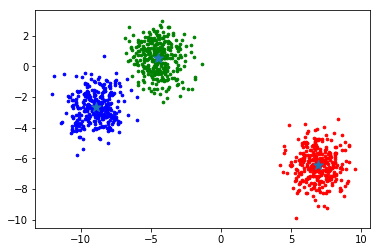

In [71]:
k=3

Indecies_centroid = np.random.choice(n_samples,size=k) # for initialization we choose some random datapoint in order to avoid that no data points were assigned to random centroid


C=X[Indecies_centroid]

clusters = np.zeros(len(X))
C_old = np.zeros(C.shape)
error = dist(C, C_old) # Konvergenz


while error.all() != 0:

    for i in range(len(X)):
            distances = dist(C,[X[i]])
            cluster = np.argmin(distances)
            clusters[i] = cluster
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old)
    
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=100)
    

    

WSS=0

for j in range(len(X)):
        # points = np.array([X[j])
        WSS += dist(X[j],C[int(clusters[j])], ax = 0)**2
        # print(within_cluster_distances)
        # within_cluster_sum_of_distances=within_cluster_distances.sum()
        # WSS=WSS+within_cluster_sum_of_distances
        
print(WSS)
  

scikit learn implementation


In [72]:
clusters[1]

0.0

In [75]:
kmeans = KMeans(n_clusters=3)

In [76]:
a = kmeans.fit_predict(X)

In [77]:
kmeans.inertia_

2003.382151453644

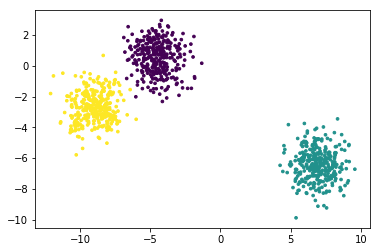

In [78]:
plt.scatter(X[:, 0], X[:, 1], c=a,s=7)

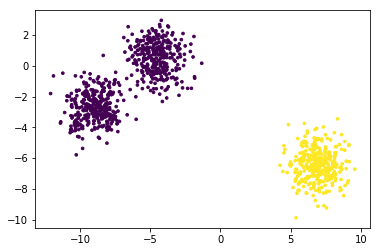

In [57]:
plt.scatter(X[:, 0], X[:, 1], c=a,s=7)

In [68]:
WSS = 0
for j in range(len(X)):
        # points = np.array([X[j])
        WSS += dist(X[j],kmeans.cluster_centers_[a[j]], ax = 0)**2
        # print(within_cluster_distances)
        # within_cluster_sum_of_distances=within_cluster_distances.sum()
        # WSS=WSS+within_cluster_sum_of_distances
        
print(WSS)
  

7005.744414888122


In [65]:
a[1]

0